# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
% matplotlib in line

UsageError: Line magic function `%` not found.


In [2]:
titanic=pd.read_csv("C:/Users/renuk/Desktop/cod/tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic.shape

(418, 12)

# DATA ANALYSIS AND VISUALIZATION
For further exploring the data, let us visually represent the data in order to get a better idea. Seaborn, Matplotlib data visualization libraries in Python are used in this Machine Learning Project.

# Analysing data 

<Axes: xlabel='Survived', ylabel='count'>

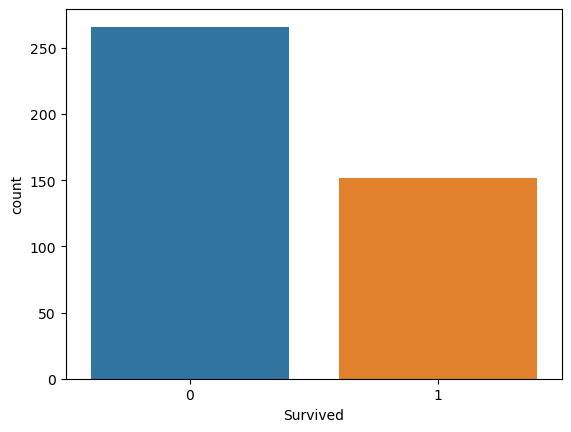

In [4]:
sns.countplot(x='Survived',data=titanic)

In [5]:
#thsoe who did not survived (more than 260) are greater than those who survied (nearly 150)

<Axes: xlabel='Survived', ylabel='count'>

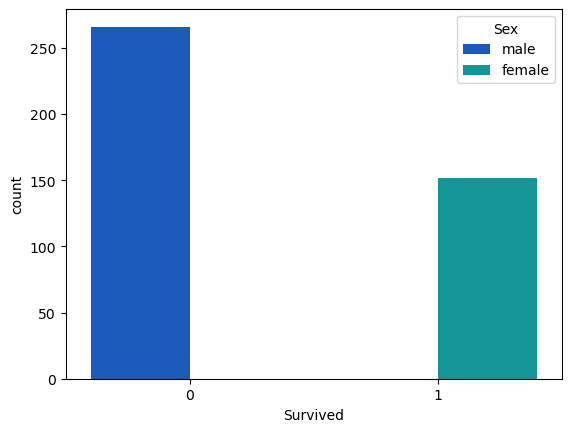

In [6]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

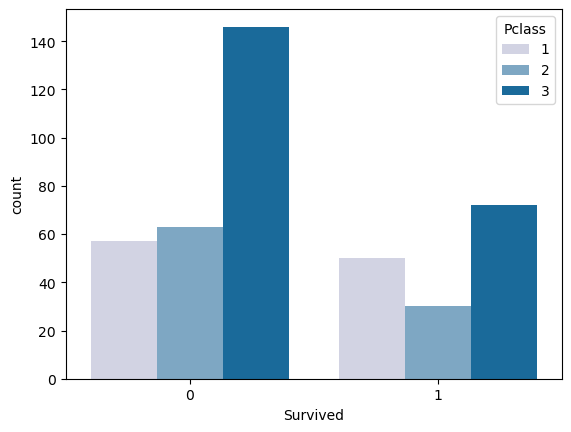

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='PuBu')

In [8]:
##Analysis: Passangers who did not survived belong to th 3rd class.
## 1st class passangers are more likely to survive 

<Axes: ylabel='Frequency'>

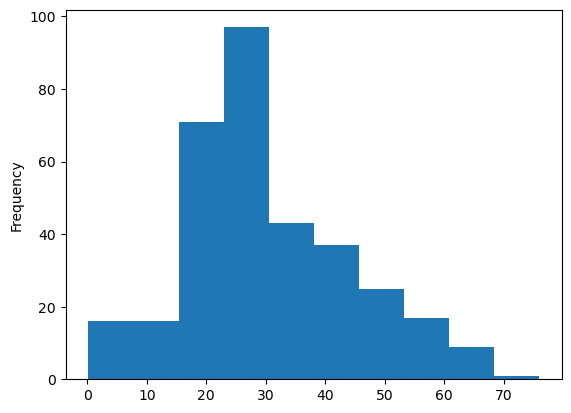

In [9]:
titanic['Age'].plot.hist()

In [10]:
# we notice that highest age  group travelling are among the young age between 20-40
# very few passangers in age group in age group 70-80

<Axes: ylabel='Frequency'>

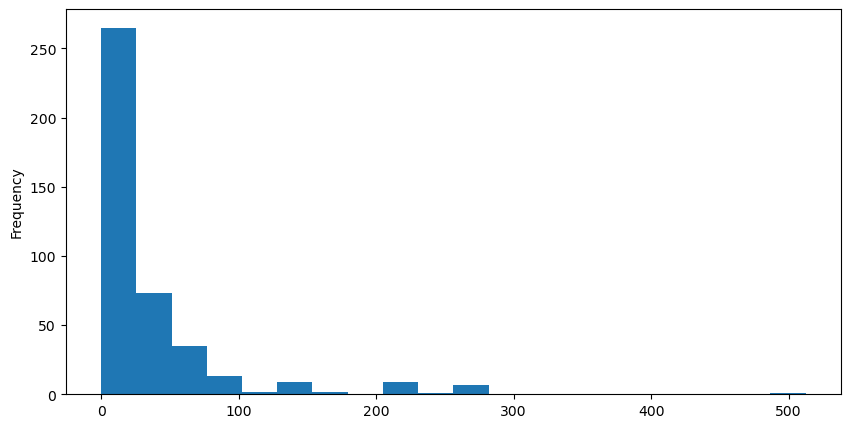

In [11]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))

In [12]:
#we observe that most of the tickets bought are under fare 100
# and very few are on the higher side of the fare i.e. 200-500 range

<Axes: xlabel='SibSp', ylabel='count'>

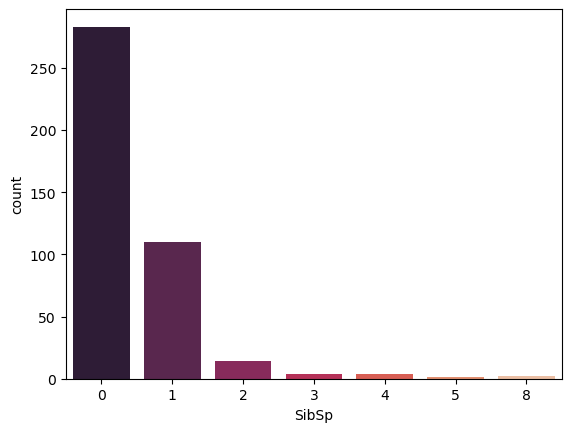

In [13]:
sns.countplot(x='SibSp',data=titanic,palette='rocket')

In [14]:
#we notice that most of the passemger do not   have their siblings aaboard

<Axes: ylabel='Frequency'>

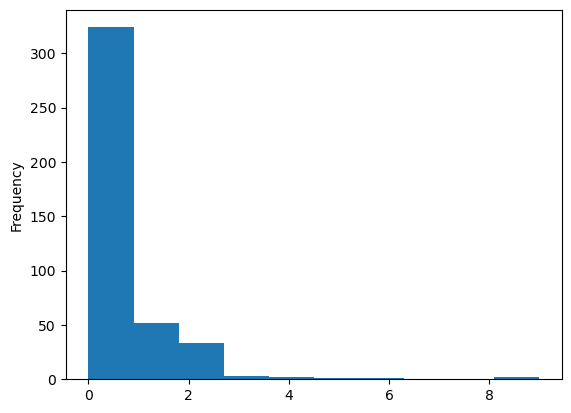

In [15]:
titanic['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

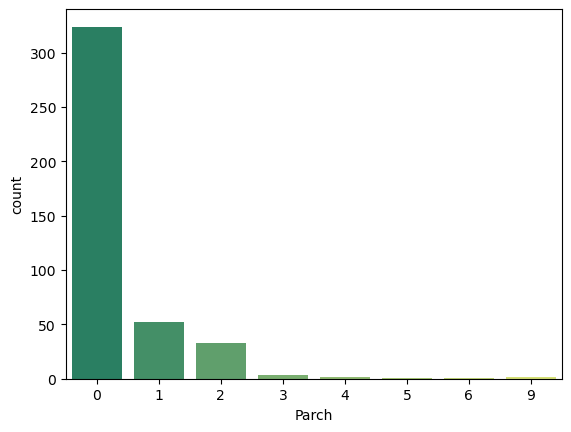

In [16]:
sns.countplot(x='Parch',data=titanic,palette='summer')

In [17]:
#The number of the parents and siblings who aboard the ship are less

# DATA WRANGLING

In [18]:
## Data wrangling means cleaning the data,removing the null values,
# dropping unwanted colums,adding new ones if needed.

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
# age and cabin has most null values.and embarked too has null values 
# we can plot it on heat map

<Axes: >

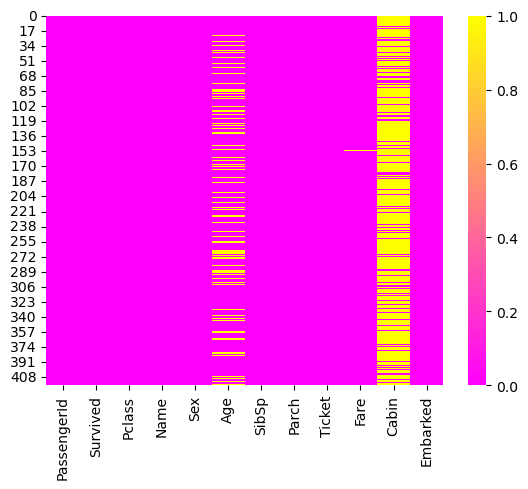

In [21]:
sns.heatmap(titanic.isnull(),cmap='spring')

In [22]:
## here yellow colour is showing the null values ,highest in cabin followed by age 

<Axes: xlabel='Pclass', ylabel='Age'>

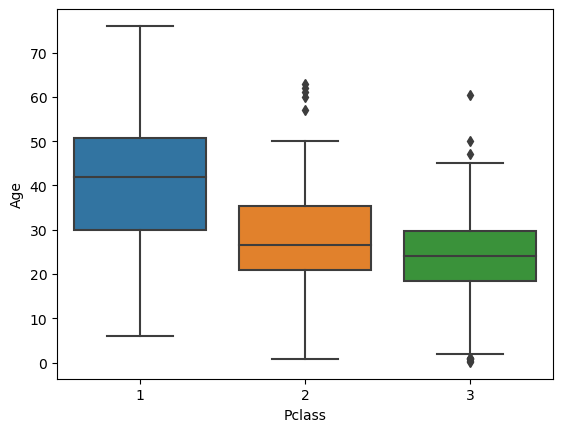

In [23]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [24]:
#we can oberve that older agegroup are travelling more in class 1 ans 2 
# compared to class 3.

# Dropping Columns
Drop the less significant columns in this case Cabin. the Cabin column is not conveying much information as insights can be gathered from other columns like PClass, Embarked etc. Hence, i dropped the Cabin Column. Also, check for any null values, if present we drop all the null values using dropna() function in Python.

In [25]:
## we will drop a few columns now 

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
titanic.drop('Cabin',axis=1,inplace=True)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [29]:
titanic.dropna(inplace=True)

<Axes: >

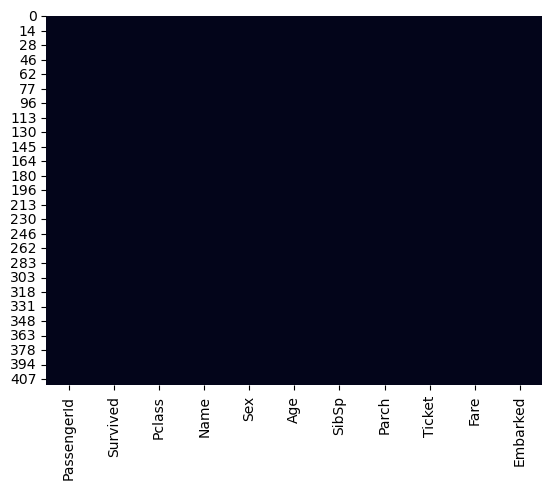

In [30]:
sns.heatmap(titanic.isnull(),cbar=False)

In [31]:
# this shows that we dont have any null values we can also check it:

In [32]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


# Model Building Process
Prepare the model before it is given as an input to the Machine Leaning(ML) Algorithm. The ML Algorithms do not understand categorical or any other data, which are not numbers, Hence, I will convert the columns with categorical data(Sex, PClass, Embarked) into numeric using One Hot Encoding.

# ONE HOT ENCODING
One-Hot Encoding simply creates one column for every possible value and put a 1 in the appropriate column. 

I will convert a few columns into categorical data to perform Logistic Regression, as Logistic Regression takes categorical /binary values. get_dummies() function is used to Convert categorical variable into dummy/indicator variables. For more information visit the Pandas documnetation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [34]:
pd.get_dummies(titanic['Sex']).head(5)


,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [35]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,1


In [36]:
# we have dropped the first column because only one coulumn is sufficient to determine
#the gender of the passanger either will  male(1) or not(0) that means a female

In [37]:
embark= pd.get_dummies(titanic['Embarked'])

In [38]:
embark.head(3)

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0


In [39]:
# C stands for cherbourf,Q for Queenstown,5 for Southhampton.
# we can drop any one of the column as we can infer from the two columns itself

In [40]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
embark.head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [41]:
Pc1 = pd.get_dummies(titanic['Pclass'],drop_first=True)
Pc1.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [42]:
# our data is now convertes into catergorial data

In [43]:

# Correct any discrepancies in the column names and try dropping them again
titanic.drop(['Name', 'PassengerId', 'Pclass', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)


In [44]:
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare
0,0,34.5,0,0,7.8292
1,1,47.0,1,0,7.0000
2,0,62.0,0,0,9.6875


# Training the Model
To train the model, first perform the train, test split and then Logistic Regression Algorithm is applied on to the data.



In [45]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=4)

In [48]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [49]:
lm.fit(X_train,y_train)

LogisticRegression()

In [50]:
prediction=lm.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.59      0.92      0.72        62\n           1       0.64      0.19      0.29        48\n\n    accuracy                           0.60       110\n   macro avg       0.62      0.55      0.51       110\nweighted avg       0.62      0.60      0.53       110\n'

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,prediction)

array([[57,  5],
       [39,  9]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,prediction)

0.6

In [57]:
#we have the accurarcy of 60% which is quite bad and the model predict the data quite accurately.

# Concluding 
I notice here that accuracy score is close to 60% which makes our model a good model to predict the values accurately , here in Titanic data set our model accurately predicts as to who will survive and who will not survive.

Through Visualization we found out that females have more chances of survival than males, class 1 have more changes of survival, youth age group 20-35 yrs male from class 3 have not survived.

Further, other Machine Learning Algorithms can be applied on the same data set, Ensemble algorithms to boost the performance of the model and get good predictions